# Homework-2: MLP for MNIST Classification

### In this homework, you need to
- #### implement SGD optimizer (`./optimizer.py`)
- #### implement forward and backward for FCLayer (`layers/fc_layer.py`)
- #### implement forward and backward for SigmoidLayer (`layers/sigmoid_layer.py`)
- #### implement forward and backward for ReLULayer (`layers/relu_layer.py`)
- #### implement EuclideanLossLayer (`criterion/euclidean_loss.py`)
- #### implement SoftmaxCrossEntropyLossLayer (`criterion/softmax_cross_entropy.py`)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow.compat.v1 as tf
tf.disable_eager_execution()

from network import Network
from solver import train, test
from plot import plot_loss_and_acc

## Load MNIST Dataset
We use tensorflow tools to load dataset for convenience.

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
def decode_image(image):
    # Normalize from [0, 255.] to [0., 1.0], and then subtract by the mean value
    image = tf.cast(image, tf.float32)
    image = tf.reshape(image, [784])
    image = image / 255.0
    image = image - tf.reduce_mean(image)
    return image

def decode_label(label):
    # Encode label with one-hot encoding
    return tf.one_hot(label, depth=10)

In [4]:
# Data Preprocessing
x_train = tf.data.Dataset.from_tensor_slices(x_train).map(decode_image)
y_train = tf.data.Dataset.from_tensor_slices(y_train).map(decode_label)
data_train = tf.data.Dataset.zip((x_train, y_train))

x_test = tf.data.Dataset.from_tensor_slices(x_test).map(decode_image)
y_test = tf.data.Dataset.from_tensor_slices(y_test).map(decode_label)
data_test = tf.data.Dataset.zip((x_test, y_test))

## Set Hyerparameters
You can modify hyerparameters by yourself.

In [5]:
batch_size = 100
max_epoch = 20
init_std = 0.01

learning_rate_SGD = 0.001
weight_decay = 0.1

disp_freq = 50

## 1. MLP with Euclidean Loss
In part-1, you need to train a MLP with **Euclidean Loss**.  
**Sigmoid Activation Function** and **ReLU Activation Function** will be used respectively.
### TODO
Before executing the following code, you should complete **./optimizer.py** and **criterion/euclidean_loss.py**.

In [6]:
from criterion import EuclideanLossLayer
from optimizer import SGD

criterion = EuclideanLossLayer()

sgd = SGD(learning_rate_SGD, weight_decay)

## 1.1 MLP with Euclidean Loss and Sigmoid Activation Function
Build and train a MLP contraining one hidden layer with 128 units using Sigmoid activation function and Euclidean loss function.

### TODO
Before executing the following code, you should complete **layers/fc_layer.py** and **layers/sigmoid_layer.py**.

In [7]:
from layers import FCLayer, SigmoidLayer

sigmoidMLP = Network()
# Build MLP with FCLayer and SigmoidLayer
# 128 is the number of hidden units, you can change by your own
sigmoidMLP.add(FCLayer(784, 128))
sigmoidMLP.add(SigmoidLayer())
sigmoidMLP.add(FCLayer(128, 10))

In [8]:
sigmoidMLP, sigmoid_loss, sigmoid_acc = train(sigmoidMLP, criterion, sgd, data_train, max_epoch, batch_size, disp_freq)

Instructions for updating:
Use `for ... in dataset:` to iterate over a dataset. If using `tf.estimator`, return the `Dataset` object directly from your input function. As a last resort, you can use `tf.compat.v1.data.make_one_shot_iterator(dataset)`.
Epoch [0][20]	 Batch [0][550]	 Training Loss 3.6151	 Accuracy 0.1300
Epoch [0][20]	 Batch [50][550]	 Training Loss 4.6021	 Accuracy 0.1573
Epoch [0][20]	 Batch [100][550]	 Training Loss 2.5502	 Accuracy 0.2150
Epoch [0][20]	 Batch [150][550]	 Training Loss 1.8354	 Accuracy 0.2755
Epoch [0][20]	 Batch [200][550]	 Training Loss 1.4665	 Accuracy 0.3572
Epoch [0][20]	 Batch [250][550]	 Training Loss 1.2397	 Accuracy 0.4194
Epoch [0][20]	 Batch [300][550]	 Training Loss 1.0843	 Accuracy 0.4675
Epoch [0][20]	 Batch [350][550]	 Training Loss 0.9710	 Accuracy 0.5049
Epoch [0][20]	 Batch [400][550]	 Training Loss 0.8844	 Accuracy 0.5361
Epoch [0][20]	 Batch [450][550]	 Training Loss 0.8157	 Accuracy 0.5620
Epoch [0][20]	 Batch [500][550]	 Training 

Epoch [8][20]	 Batch [200][550]	 Training Loss 0.1093	 Accuracy 0.9152
Epoch [8][20]	 Batch [250][550]	 Training Loss 0.1092	 Accuracy 0.9159
Epoch [8][20]	 Batch [300][550]	 Training Loss 0.1092	 Accuracy 0.9156
Epoch [8][20]	 Batch [350][550]	 Training Loss 0.1097	 Accuracy 0.9146
Epoch [8][20]	 Batch [400][550]	 Training Loss 0.1097	 Accuracy 0.9143
Epoch [8][20]	 Batch [450][550]	 Training Loss 0.1098	 Accuracy 0.9144
Epoch [8][20]	 Batch [500][550]	 Training Loss 0.1100	 Accuracy 0.9138

Epoch [8]	 Average training loss 0.1098	 Average training accuracy 0.9137
Epoch [8]	 Average validation loss 0.0924	 Average validation accuracy 0.9360

Epoch [9][20]	 Batch [0][550]	 Training Loss 0.0928	 Accuracy 0.9500
Epoch [9][20]	 Batch [50][550]	 Training Loss 0.1015	 Accuracy 0.9251
Epoch [9][20]	 Batch [100][550]	 Training Loss 0.1035	 Accuracy 0.9198
Epoch [9][20]	 Batch [150][550]	 Training Loss 0.1063	 Accuracy 0.9164
Epoch [9][20]	 Batch [200][550]	 Training Loss 0.1060	 Accuracy 0.91

Epoch [17][20]	 Batch [50][550]	 Training Loss 0.0883	 Accuracy 0.9320
Epoch [17][20]	 Batch [100][550]	 Training Loss 0.0904	 Accuracy 0.9273
Epoch [17][20]	 Batch [150][550]	 Training Loss 0.0931	 Accuracy 0.9240
Epoch [17][20]	 Batch [200][550]	 Training Loss 0.0928	 Accuracy 0.9249
Epoch [17][20]	 Batch [250][550]	 Training Loss 0.0929	 Accuracy 0.9254
Epoch [17][20]	 Batch [300][550]	 Training Loss 0.0930	 Accuracy 0.9252
Epoch [17][20]	 Batch [350][550]	 Training Loss 0.0936	 Accuracy 0.9244
Epoch [17][20]	 Batch [400][550]	 Training Loss 0.0938	 Accuracy 0.9243
Epoch [17][20]	 Batch [450][550]	 Training Loss 0.0939	 Accuracy 0.9245
Epoch [17][20]	 Batch [500][550]	 Training Loss 0.0944	 Accuracy 0.9237

Epoch [17]	 Average training loss 0.0942	 Average training accuracy 0.9235
Epoch [17]	 Average validation loss 0.0797	 Average validation accuracy 0.9444

Epoch [18][20]	 Batch [0][550]	 Training Loss 0.0799	 Accuracy 0.9500
Epoch [18][20]	 Batch [50][550]	 Training Loss 0.0874	 

In [9]:
test(sigmoidMLP, criterion, data_test, batch_size, disp_freq)

Testing...
The test accuracy is 0.9296.



## 1.2 MLP with Euclidean Loss and ReLU Activation Function
Build and train a MLP contraining one hidden layer with 128 units using ReLU activation function and Euclidean loss function.

### TODO
Before executing the following code, you should complete **layers/relu_layer.py**.

In [10]:
from layers import ReLULayer

reluMLP = Network()
# TODO build ReLUMLP with FCLayer and ReLULayer
reluMLP.add(FCLayer(784, 128))
reluMLP.add(ReLULayer())
reluMLP.add(FCLayer(128, 10))

In [11]:
reluMLP, relu_loss, relu_acc = train(reluMLP, criterion, sgd, data_train, max_epoch, batch_size, disp_freq)

Epoch [0][20]	 Batch [0][550]	 Training Loss 2.5550	 Accuracy 0.1200
Epoch [0][20]	 Batch [50][550]	 Training Loss 0.5251	 Accuracy 0.5776
Epoch [0][20]	 Batch [100][550]	 Training Loss 0.3910	 Accuracy 0.6829
Epoch [0][20]	 Batch [150][550]	 Training Loss 0.3344	 Accuracy 0.7289
Epoch [0][20]	 Batch [200][550]	 Training Loss 0.2980	 Accuracy 0.7594
Epoch [0][20]	 Batch [250][550]	 Training Loss 0.2727	 Accuracy 0.7806
Epoch [0][20]	 Batch [300][550]	 Training Loss 0.2536	 Accuracy 0.7957
Epoch [0][20]	 Batch [350][550]	 Training Loss 0.2390	 Accuracy 0.8075
Epoch [0][20]	 Batch [400][550]	 Training Loss 0.2268	 Accuracy 0.8170
Epoch [0][20]	 Batch [450][550]	 Training Loss 0.2164	 Accuracy 0.8260
Epoch [0][20]	 Batch [500][550]	 Training Loss 0.2084	 Accuracy 0.8317

Epoch [0]	 Average training loss 0.2007	 Average training accuracy 0.8379
Epoch [0]	 Average validation loss 0.1061	 Average validation accuracy 0.9308

Epoch [1][20]	 Batch [0][550]	 Training Loss 0.0996	 Accuracy 0.9300


Epoch [8]	 Average training loss 0.0639	 Average training accuracy 0.9551
Epoch [8]	 Average validation loss 0.0571	 Average validation accuracy 0.9662

Epoch [9][20]	 Batch [0][550]	 Training Loss 0.0532	 Accuracy 0.9700
Epoch [9][20]	 Batch [50][550]	 Training Loss 0.0584	 Accuracy 0.9622
Epoch [9][20]	 Batch [100][550]	 Training Loss 0.0603	 Accuracy 0.9597
Epoch [9][20]	 Batch [150][550]	 Training Loss 0.0617	 Accuracy 0.9588
Epoch [9][20]	 Batch [200][550]	 Training Loss 0.0614	 Accuracy 0.9588
Epoch [9][20]	 Batch [250][550]	 Training Loss 0.0611	 Accuracy 0.9586
Epoch [9][20]	 Batch [300][550]	 Training Loss 0.0615	 Accuracy 0.9578
Epoch [9][20]	 Batch [350][550]	 Training Loss 0.0616	 Accuracy 0.9576
Epoch [9][20]	 Batch [400][550]	 Training Loss 0.0617	 Accuracy 0.9573
Epoch [9][20]	 Batch [450][550]	 Training Loss 0.0616	 Accuracy 0.9575
Epoch [9][20]	 Batch [500][550]	 Training Loss 0.0621	 Accuracy 0.9569

Epoch [9]	 Average training loss 0.0619	 Average training accuracy 

Epoch [17][20]	 Batch [350][550]	 Training Loss 0.0518	 Accuracy 0.9673
Epoch [17][20]	 Batch [400][550]	 Training Loss 0.0519	 Accuracy 0.9671
Epoch [17][20]	 Batch [450][550]	 Training Loss 0.0519	 Accuracy 0.9671
Epoch [17][20]	 Batch [500][550]	 Training Loss 0.0523	 Accuracy 0.9664

Epoch [17]	 Average training loss 0.0522	 Average training accuracy 0.9664
Epoch [17]	 Average validation loss 0.0489	 Average validation accuracy 0.9740

Epoch [18][20]	 Batch [0][550]	 Training Loss 0.0466	 Accuracy 0.9700
Epoch [18][20]	 Batch [50][550]	 Training Loss 0.0485	 Accuracy 0.9712
Epoch [18][20]	 Batch [100][550]	 Training Loss 0.0499	 Accuracy 0.9691
Epoch [18][20]	 Batch [150][550]	 Training Loss 0.0510	 Accuracy 0.9691
Epoch [18][20]	 Batch [200][550]	 Training Loss 0.0508	 Accuracy 0.9692
Epoch [18][20]	 Batch [250][550]	 Training Loss 0.0506	 Accuracy 0.9689
Epoch [18][20]	 Batch [300][550]	 Training Loss 0.0511	 Accuracy 0.9680
Epoch [18][20]	 Batch [350][550]	 Training Loss 0.0511	

In [12]:
test(reluMLP, criterion, data_test, batch_size, disp_freq)

Testing...
The test accuracy is 0.9656.



## Plot

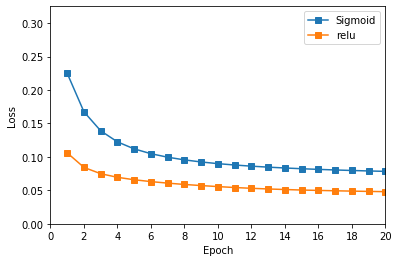

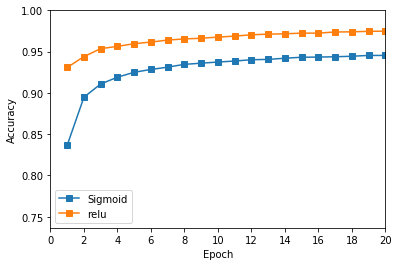

In [13]:
plot_loss_and_acc({'Sigmoid': [sigmoid_loss, sigmoid_acc],
                   'relu': [relu_loss, relu_acc]})

## 2. MLP with Softmax Cross-Entropy Loss
In part-2, you need to train a MLP with **Softmax Cross-Entropy Loss**.  
**Sigmoid Activation Function** and **ReLU Activation Function** will be used respectively again.
### TODO
Before executing the following code, you should complete **criterion/softmax_cross_entropy_loss.py**.

In [14]:
from criterion import SoftmaxCrossEntropyLossLayer

criterion = SoftmaxCrossEntropyLossLayer()

sgd = SGD(learning_rate_SGD, weight_decay)

## 2.1 MLP with Softmax Cross-Entropy Loss and Sigmoid Activation Function
Build and train a MLP contraining one hidden layer with 128 units using Sigmoid activation function and Softmax cross-entropy loss function.

In [15]:
sigmoidMLP = Network()
# Build MLP with FCLayer and SigmoidLayer
# 128 is the number of hidden units, you can change by your own
sigmoidMLP.add(FCLayer(784, 128))
sigmoidMLP.add(SigmoidLayer())
sigmoidMLP.add(FCLayer(128, 10))

### Train

In [16]:
sigmoidMLP, sigmoid_loss, sigmoid_acc = train(sigmoidMLP, criterion, sgd, data_train, max_epoch, batch_size, disp_freq)

Epoch [0][20]	 Batch [0][550]	 Training Loss 2.5801	 Accuracy 0.1100
Epoch [0][20]	 Batch [50][550]	 Training Loss 2.5388	 Accuracy 0.1020
Epoch [0][20]	 Batch [100][550]	 Training Loss 2.4858	 Accuracy 0.1044
Epoch [0][20]	 Batch [150][550]	 Training Loss 2.4536	 Accuracy 0.1142
Epoch [0][20]	 Batch [200][550]	 Training Loss 2.4279	 Accuracy 0.1239
Epoch [0][20]	 Batch [250][550]	 Training Loss 2.4058	 Accuracy 0.1313
Epoch [0][20]	 Batch [300][550]	 Training Loss 2.3842	 Accuracy 0.1407
Epoch [0][20]	 Batch [350][550]	 Training Loss 2.3669	 Accuracy 0.1482
Epoch [0][20]	 Batch [400][550]	 Training Loss 2.3517	 Accuracy 0.1547
Epoch [0][20]	 Batch [450][550]	 Training Loss 2.3373	 Accuracy 0.1620
Epoch [0][20]	 Batch [500][550]	 Training Loss 2.3239	 Accuracy 0.1679

Epoch [0]	 Average training loss 2.3120	 Average training accuracy 0.1740
Epoch [0]	 Average validation loss 2.1830	 Average validation accuracy 0.2482

Epoch [1][20]	 Batch [0][550]	 Training Loss 2.1917	 Accuracy 0.2500


Epoch [8]	 Average training loss 1.8688	 Average training accuracy 0.7033
Epoch [8]	 Average validation loss 1.8439	 Average validation accuracy 0.7410

Epoch [9][20]	 Batch [0][550]	 Training Loss 1.8396	 Accuracy 0.7500
Epoch [9][20]	 Batch [50][550]	 Training Loss 1.8570	 Accuracy 0.7098
Epoch [9][20]	 Batch [100][550]	 Training Loss 1.8571	 Accuracy 0.7055
Epoch [9][20]	 Batch [150][550]	 Training Loss 1.8589	 Accuracy 0.7038
Epoch [9][20]	 Batch [200][550]	 Training Loss 1.8609	 Accuracy 0.7039
Epoch [9][20]	 Batch [250][550]	 Training Loss 1.8601	 Accuracy 0.7049
Epoch [9][20]	 Batch [300][550]	 Training Loss 1.8583	 Accuracy 0.7066
Epoch [9][20]	 Batch [350][550]	 Training Loss 1.8608	 Accuracy 0.7066
Epoch [9][20]	 Batch [400][550]	 Training Loss 1.8605	 Accuracy 0.7067
Epoch [9][20]	 Batch [450][550]	 Training Loss 1.8613	 Accuracy 0.7065
Epoch [9][20]	 Batch [500][550]	 Training Loss 1.8609	 Accuracy 0.7070

Epoch [9]	 Average training loss 1.8604	 Average training accuracy 

Epoch [17][20]	 Batch [350][550]	 Training Loss 1.8621	 Accuracy 0.6981
Epoch [17][20]	 Batch [400][550]	 Training Loss 1.8622	 Accuracy 0.6987
Epoch [17][20]	 Batch [450][550]	 Training Loss 1.8636	 Accuracy 0.6989
Epoch [17][20]	 Batch [500][550]	 Training Loss 1.8638	 Accuracy 0.7002

Epoch [17]	 Average training loss 1.8638	 Average training accuracy 0.7012
Epoch [17]	 Average validation loss 1.8462	 Average validation accuracy 0.7318

Epoch [18][20]	 Batch [0][550]	 Training Loss 1.8379	 Accuracy 0.7300
Epoch [18][20]	 Batch [50][550]	 Training Loss 1.8584	 Accuracy 0.7022
Epoch [18][20]	 Batch [100][550]	 Training Loss 1.8589	 Accuracy 0.6983
Epoch [18][20]	 Batch [150][550]	 Training Loss 1.8616	 Accuracy 0.6947
Epoch [18][20]	 Batch [200][550]	 Training Loss 1.8643	 Accuracy 0.6933
Epoch [18][20]	 Batch [250][550]	 Training Loss 1.8641	 Accuracy 0.6948
Epoch [18][20]	 Batch [300][550]	 Training Loss 1.8633	 Accuracy 0.6953
Epoch [18][20]	 Batch [350][550]	 Training Loss 1.8663	

### Test

In [17]:
test(sigmoidMLP, criterion, data_test, batch_size, disp_freq)

Testing...
The test accuracy is 0.7050.



## 2.2 MLP with Softmax Cross-Entropy Loss and ReLU Activation Function
Build and train a MLP contraining one hidden layer with 128 units using ReLU activation function and Softmax cross-entropy loss function.

In [18]:
reluMLP = Network()
# Build ReLUMLP with FCLayer and ReLULayer
# 128 is the number of hidden units, you can change by your own
reluMLP.add(FCLayer(784, 128))
reluMLP.add(ReLULayer())
reluMLP.add(FCLayer(128, 10))

In [19]:
reluMLP, relu_loss, relu_acc = train(reluMLP, criterion, sgd, data_train, max_epoch, batch_size, disp_freq)

Epoch [0][20]	 Batch [0][550]	 Training Loss 2.7358	 Accuracy 0.0800
Epoch [0][20]	 Batch [50][550]	 Training Loss 2.5296	 Accuracy 0.1049
Epoch [0][20]	 Batch [100][550]	 Training Loss 2.4575	 Accuracy 0.1134
Epoch [0][20]	 Batch [150][550]	 Training Loss 2.3856	 Accuracy 0.1319
Epoch [0][20]	 Batch [200][550]	 Training Loss 2.3245	 Accuracy 0.1509
Epoch [0][20]	 Batch [250][550]	 Training Loss 2.2716	 Accuracy 0.1748
Epoch [0][20]	 Batch [300][550]	 Training Loss 2.2211	 Accuracy 0.2006
Epoch [0][20]	 Batch [350][550]	 Training Loss 2.1816	 Accuracy 0.2232
Epoch [0][20]	 Batch [400][550]	 Training Loss 2.1419	 Accuracy 0.2472
Epoch [0][20]	 Batch [450][550]	 Training Loss 2.1051	 Accuracy 0.2708
Epoch [0][20]	 Batch [500][550]	 Training Loss 2.0699	 Accuracy 0.2914

Epoch [0]	 Average training loss 2.0361	 Average training accuracy 0.3125
Epoch [0]	 Average validation loss 1.6281	 Average validation accuracy 0.5600

Epoch [1][20]	 Batch [0][550]	 Training Loss 1.6847	 Accuracy 0.5300


Epoch [8]	 Average training loss 0.8433	 Average training accuracy 0.8358
Epoch [8]	 Average validation loss 0.7609	 Average validation accuracy 0.8810

Epoch [9][20]	 Batch [0][550]	 Training Loss 0.8049	 Accuracy 0.8700
Epoch [9][20]	 Batch [50][550]	 Training Loss 0.8106	 Accuracy 0.8463
Epoch [9][20]	 Batch [100][550]	 Training Loss 0.8154	 Accuracy 0.8455
Epoch [9][20]	 Batch [150][550]	 Training Loss 0.8235	 Accuracy 0.8409
Epoch [9][20]	 Batch [200][550]	 Training Loss 0.8269	 Accuracy 0.8422
Epoch [9][20]	 Batch [250][550]	 Training Loss 0.8248	 Accuracy 0.8425
Epoch [9][20]	 Batch [300][550]	 Training Loss 0.8239	 Accuracy 0.8423
Epoch [9][20]	 Batch [350][550]	 Training Loss 0.8302	 Accuracy 0.8410
Epoch [9][20]	 Batch [400][550]	 Training Loss 0.8297	 Accuracy 0.8416
Epoch [9][20]	 Batch [450][550]	 Training Loss 0.8311	 Accuracy 0.8415
Epoch [9][20]	 Batch [500][550]	 Training Loss 0.8315	 Accuracy 0.8411

Epoch [9]	 Average training loss 0.8303	 Average training accuracy 

Epoch [17][20]	 Batch [350][550]	 Training Loss 0.8113	 Accuracy 0.8578
Epoch [17][20]	 Batch [400][550]	 Training Loss 0.8114	 Accuracy 0.8586
Epoch [17][20]	 Batch [450][550]	 Training Loss 0.8132	 Accuracy 0.8582
Epoch [17][20]	 Batch [500][550]	 Training Loss 0.8141	 Accuracy 0.8576

Epoch [17]	 Average training loss 0.8136	 Average training accuracy 0.8575
Epoch [17]	 Average validation loss 0.7418	 Average validation accuracy 0.8972

Epoch [18][20]	 Batch [0][550]	 Training Loss 0.7778	 Accuracy 0.8900
Epoch [18][20]	 Batch [50][550]	 Training Loss 0.7913	 Accuracy 0.8684
Epoch [18][20]	 Batch [100][550]	 Training Loss 0.7966	 Accuracy 0.8656
Epoch [18][20]	 Batch [150][550]	 Training Loss 0.8049	 Accuracy 0.8593
Epoch [18][20]	 Batch [200][550]	 Training Loss 0.8087	 Accuracy 0.8594
Epoch [18][20]	 Batch [250][550]	 Training Loss 0.8070	 Accuracy 0.8592
Epoch [18][20]	 Batch [300][550]	 Training Loss 0.8068	 Accuracy 0.8597
Epoch [18][20]	 Batch [350][550]	 Training Loss 0.8131	

In [20]:
test(reluMLP, criterion, data_test, batch_size, disp_freq)

Testing...
The test accuracy is 0.8710.



## Plot

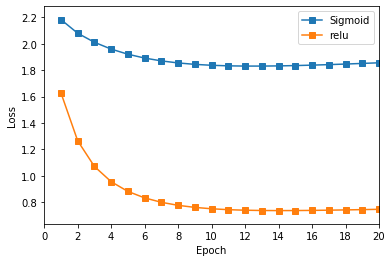

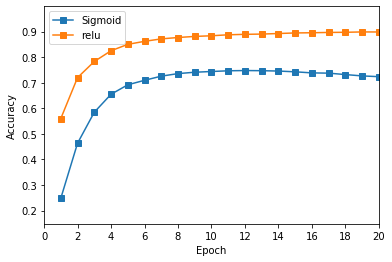

In [21]:
plot_loss_and_acc({'Sigmoid': [sigmoid_loss, sigmoid_acc],
                   'relu': [relu_loss, relu_acc]})

### ~~You have finished homework2-mlp, congratulations!~~  

**Next, according to the requirements 4) of report:**
### **You need to construct a two-hidden-layer MLP, using any activation function and loss function.**

**Note: Please insert some new cells blow (using '+' bottom in the toolbar) refer to above codes. Do not modify the former code directly.**

In [22]:
criterion = SoftmaxCrossEntropyLossLayer()
relu_relu_soft_MLP = Network()

relu_relu_soft_MLP.add(FCLayer(784, 128))
relu_relu_soft_MLP.add(ReLULayer())
relu_relu_soft_MLP.add(FCLayer(128, 128))
relu_relu_soft_MLP.add(ReLULayer())
relu_relu_soft_MLP.add(FCLayer(128, 10))

### train

In [23]:
relu_relu_soft_MLP, relu_relu_soft_loss, relu_relu_soft_acc = train(relu_relu_soft_MLP, criterion, sgd, data_train, max_epoch, batch_size, disp_freq)

Epoch [0][20]	 Batch [0][550]	 Training Loss 2.4801	 Accuracy 0.1000
Epoch [0][20]	 Batch [50][550]	 Training Loss 2.3863	 Accuracy 0.1061
Epoch [0][20]	 Batch [100][550]	 Training Loss 2.3323	 Accuracy 0.1156
Epoch [0][20]	 Batch [150][550]	 Training Loss 2.2837	 Accuracy 0.1336
Epoch [0][20]	 Batch [200][550]	 Training Loss 2.2436	 Accuracy 0.1556
Epoch [0][20]	 Batch [250][550]	 Training Loss 2.2086	 Accuracy 0.1796
Epoch [0][20]	 Batch [300][550]	 Training Loss 2.1767	 Accuracy 0.2014
Epoch [0][20]	 Batch [350][550]	 Training Loss 2.1500	 Accuracy 0.2223
Epoch [0][20]	 Batch [400][550]	 Training Loss 2.1199	 Accuracy 0.2452
Epoch [0][20]	 Batch [450][550]	 Training Loss 2.0927	 Accuracy 0.2670
Epoch [0][20]	 Batch [500][550]	 Training Loss 2.0672	 Accuracy 0.2864

Epoch [0]	 Average training loss 2.0418	 Average training accuracy 0.3065
Epoch [0]	 Average validation loss 1.7352	 Average validation accuracy 0.5494

Epoch [1][20]	 Batch [0][550]	 Training Loss 1.7474	 Accuracy 0.5500


Epoch [8]	 Average training loss 0.8398	 Average training accuracy 0.8395
Epoch [8]	 Average validation loss 0.7619	 Average validation accuracy 0.8796

Epoch [9][20]	 Batch [0][550]	 Training Loss 0.8016	 Accuracy 0.8600
Epoch [9][20]	 Batch [50][550]	 Training Loss 0.8105	 Accuracy 0.8473
Epoch [9][20]	 Batch [100][550]	 Training Loss 0.8142	 Accuracy 0.8463
Epoch [9][20]	 Batch [150][550]	 Training Loss 0.8220	 Accuracy 0.8423
Epoch [9][20]	 Batch [200][550]	 Training Loss 0.8254	 Accuracy 0.8434
Epoch [9][20]	 Batch [250][550]	 Training Loss 0.8231	 Accuracy 0.8441
Epoch [9][20]	 Batch [300][550]	 Training Loss 0.8227	 Accuracy 0.8446
Epoch [9][20]	 Batch [350][550]	 Training Loss 0.8284	 Accuracy 0.8437
Epoch [9][20]	 Batch [400][550]	 Training Loss 0.8279	 Accuracy 0.8446
Epoch [9][20]	 Batch [450][550]	 Training Loss 0.8290	 Accuracy 0.8447
Epoch [9][20]	 Batch [500][550]	 Training Loss 0.8297	 Accuracy 0.8443

Epoch [9]	 Average training loss 0.8288	 Average training accuracy 

Epoch [17][20]	 Batch [350][550]	 Training Loss 0.8310	 Accuracy 0.8569
Epoch [17][20]	 Batch [400][550]	 Training Loss 0.8311	 Accuracy 0.8577
Epoch [17][20]	 Batch [450][550]	 Training Loss 0.8328	 Accuracy 0.8576
Epoch [17][20]	 Batch [500][550]	 Training Loss 0.8339	 Accuracy 0.8569

Epoch [17]	 Average training loss 0.8339	 Average training accuracy 0.8564
Epoch [17]	 Average validation loss 0.7707	 Average validation accuracy 0.8898

Epoch [18][20]	 Batch [0][550]	 Training Loss 0.8154	 Accuracy 0.8700
Epoch [18][20]	 Batch [50][550]	 Training Loss 0.8149	 Accuracy 0.8629
Epoch [18][20]	 Batch [100][550]	 Training Loss 0.8197	 Accuracy 0.8607
Epoch [18][20]	 Batch [150][550]	 Training Loss 0.8274	 Accuracy 0.8572
Epoch [18][20]	 Batch [200][550]	 Training Loss 0.8314	 Accuracy 0.8567
Epoch [18][20]	 Batch [250][550]	 Training Loss 0.8294	 Accuracy 0.8573
Epoch [18][20]	 Batch [300][550]	 Training Loss 0.8297	 Accuracy 0.8575
Epoch [18][20]	 Batch [350][550]	 Training Loss 0.8356	

### test

In [24]:
test(relu_relu_soft_MLP, criterion, data_test, batch_size, disp_freq)

Testing...
The test accuracy is 0.8643.



### plot

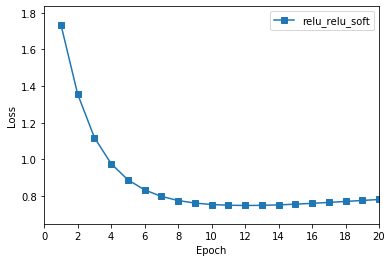

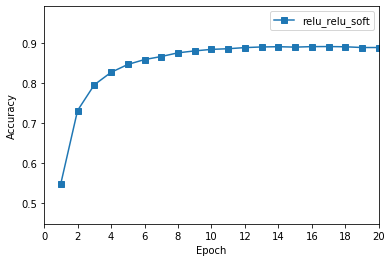

In [27]:
plot_loss_and_acc({'relu_relu_soft': [relu_relu_soft_loss, relu_relu_soft_acc]})